## Assignment: Sentiment Analysis of Reviews
### Name:Louis Orozco
### Date: 11/28/24
Question: What is the sentiment of resturants that serve italian food in the area?
Summary: Data will be sourced from yelp using yelp fusion api. These reviews will then be analyzed for sentiments either positive,negative or neutral using both a pattern analyzer and Naive Bayes Analyzer. 
A word cloud will then be created after cleaning the reviews of stop words and punctuation. 

### Accessing JSON data through an API
#### Yelp Fusion API
1. Obtain a Yelp Fusion Developer Account here: https://fusion.yelp.com/ Use your student email and access your email to verify your account.
2. Create a Yelp Fusion App.  Login to your Yelp developer account, and select Manage App under General.  Enter an App Name (such as Review Sentiments), your email and a description. 
3. Save your client id and api key in a separate (private) .py file.  This script assumes that this information is saved in yelpkeys.py with the variables client_id and api_key respectively.
4. Import your id and key into your notebook by importing the file containing this private information.


In [65]:
import requests
import yelpkeys  # file where client_id and api_key is defined with user's private app information
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import nltk

In [88]:
APIKEY = yelpkeys.api_key
headers = {'Authorization': 'Bearer %s' % yelpkeys.api_key,}

In [90]:
"""
Yelp Fusion API code sample.
This program demonstrates the capability of the Yelp Fusion API
by using the Search API to query for businesses by a search term and location,
and the Business API to query additional information about the top result
from the search query.
Please refer to https://docs.developer.yelp.com/docs/get-started for the API
documentation.
This program requires the Python requests library, which you can install via:
`pip install -r requirements.txt`.
Sample usage of the program:
`python sample.py --term="bars" --location="San Francisco, CA"`
"""
from __future__ import print_function

import argparse
import json
import pprint
import requests
import sys
import urllib


# This client code can run on Python 2.x or 3.x.  Your imports can be
# simpler if you only need one of those.
try:
    # For Python 3.0 and later
    from urllib.error import HTTPError
    from urllib.parse import quote
    from urllib.parse import urlencode
except ImportError:
    # Fall back to Python 2's urllib2 and urllib
    from urllib2 import HTTPError
    from urllib import quote
    from urllib import urlencode


# Yelp Fusion no longer uses OAuth as of December 7, 2017.
# You no longer need to provide Client ID to fetch Data
# It now uses private keys to authenticate requests (API Key)
# You can find it on
# https://www.yelp.com/developers/v3/manage_app
API_KEY= yelpkeys.api_key


# API constants, you shouldn't have to change these.
API_HOST = 'https://api.yelp.com'
SEARCH_PATH = '/v3/businesses/search'
BUSINESS_PATH = '/v3/businesses/'  # Business ID will come after slash.


# Defaults for our simple example.
DEFAULT_TERM = 'italian'
DEFAULT_LOCATION = 'San Francisco, CA'
SEARCH_LIMIT = 20


def request(host, path, api_key, url_params=None):
    """Given your API_KEY, send a GET request to the API.
    Args:
        host (str): The domain host of the API.
        path (str): The path of the API after the domain.
        API_KEY (str): Your API Key.
        url_params (dict): An optional set of query parameters in the request.
    Returns:
        dict: The JSON response from the request.
    Raises:
        HTTPError: An error occurs from the HTTP request.
    """
    url_params = url_params or {}
    url = '{0}{1}'.format(host, quote(path.encode('utf8')))
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }

    print(u'Querying {0} ...'.format(url))

    response = requests.request('GET', url, headers=headers, params=url_params)

    return response.json()


def search(api_key, term, location):
    """Query the Search API by a search term and location.
    Args:
        term (str): The search term passed to the API.
        location (str): The search location passed to the API.
    Returns:
        dict: The JSON response from the request.
    """

    url_params = {
        'term': term.replace(' ', '+'),
        'location': location.replace(' ', '+'),
        'limit': SEARCH_LIMIT
    }
    return request(API_HOST, SEARCH_PATH, api_key, url_params=url_params)


def get_business(api_key, business_id):
    """Query the Business API by a business ID.
    Args:
        business_id (str): The ID of the business to query.
    Returns:
        dict: The JSON response from the request.
    """
    business_path = BUSINESS_PATH + business_id

    return request(API_HOST, business_path, api_key)


def query_api(term, location):
    """Queries the API by the input values from the user.
    Args:
        term (str): The search term to query.
        location (str): The location of the business to query.
    """
    response = search(API_KEY, term, location)

    businesses = response.get('businesses')

    if not businesses:
        print(u'No businesses for {0} in {1} found.'.format(term, location))
        return

    business_id = businesses[0]['id']

    print(u'{0} businesses found, querying business info ' \
        'for the top result "{1}" ...'.format(
            len(businesses), business_id))
    response = get_business(API_KEY, business_id)

    print(u'Result for business "{0}" found:'.format(business_id))
    pprint.pprint(response, indent=2)

In [92]:
response = search(API_KEY,DEFAULT_TERM, 'Rockaway, NJ')

Querying https://api.yelp.com/v3/businesses/search ...


In [ ]:
response

In [ ]:
countpos = 0
countneg = 0
countneut = 0
for business in response['businesses']:
    print(response)
    print('Business Name: ' + business['name'])
    print('Rating: ' + str(business['rating']))
    print('Review Count: ' + str(business['review_count']))
    print('Reviews: ')
    BUS_REVIEW='/v3/businesses/{}/reviews'.format(business['id'])
    print('https://api.yelp.com/v3/businesses/{}/reviews?limit=20&sort_by=yelp_sort'.format(business['id']))
    reviews = request(API_HOST,BUS_REVIEW, API_KEY)
    for review in reviews['reviews']:
        print(' - ' + review['text'])
        # Perform sentiment analysis on the review using TextBlob
        blob = TextBlob(review['text'])
        sentiment = blob.sentiment.polarity
        if sentiment > 0:
            countpos += 1
            print('    Sentiment: Positive')
        elif sentiment < 0:
            countneg += 1
            print('    Sentiment: Negative')
        else:
            countneut += 1
            print('    Sentiment: Neutral')
        print('\n================\n\n\n')

### Donut Chart for sentiment analysis

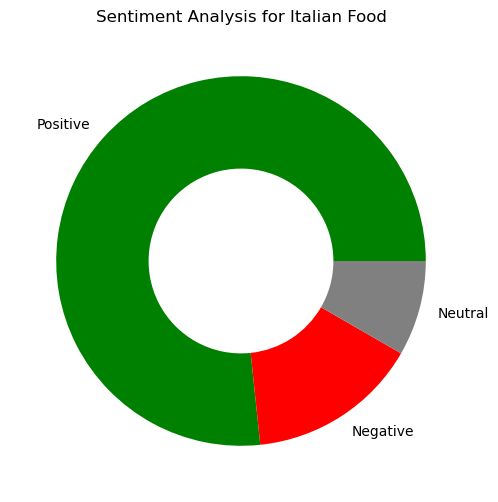

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define data
pos = countpos
neg = countneg
neu = countneut
labels = ['Positive', 'Negative', 'Neutral']
values = [pos, neg, neu]

# Create donut chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(values, labels=labels, wedgeprops=dict(width=0.5), colors=['green', 'red', 'grey'])
ax.set_title('Sentiment Analysis for Italian Food')

plt.show()

## NaiveBayesAnalyzer of Reviews

In [ ]:
countpos = 0
countneg = 0
countneut = 0
for business in response['businesses']:
    print('Business Name: ' + business['name'])
    print('Rating: ' + str(business['rating']))
    print('Review Count: ' + str(business['review_count']))
    print('Reviews: ')
    BUS_REVIEW='/v3/businesses/{}/reviews'.format(business['id'])
    reviews = request(API_HOST,BUS_REVIEW, API_KEY)
    for review in reviews['reviews']:
        print(' - ' + review['text'])
        # Perform sentiment analysis on the review using TextBlob
        blob = TextBlob(review['text'], analyzer=NaiveBayesAnalyzer())
        sentiment = blob.sentiment
        
        # Check sentiment classification
        if sentiment.classification == 'pos':
            countpos += 1
            print('    Sentiment: Positive')
        elif sentiment.classification == 'neg':
            countneg += 1
            print('    Sentiment: Negative')
        else:
            countneut += 1
            print('    Sentiment: Neutral')
        print('\n================\n\n\n')

## Donut Chart of NaiveBayesAnalyzer Sentiments

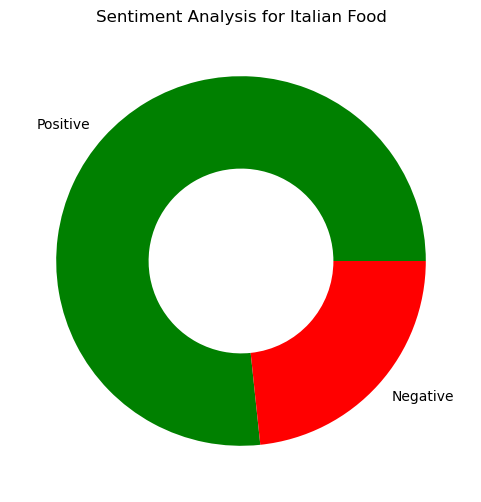

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define data
pos = countpos
neg = countneg
labels = ['Positive', 'Negative']
values = [pos, neg]

# Create donut chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(values, labels=labels, wedgeprops=dict(width=0.5), colors=['green', 'red'])
ax.set_title('Sentiment Analysis for Italian Food')

plt.show()

The overall sentiment of the reviews are postitive, both forms of analysis had a similar amount of positive reviews but the Pattern analyzer showed some of the negative reviews to be more neutral compared to the NaiveBayesAnalyzer

## Clean Reviews for Word Cloud

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources if not already installed
nltk.download('stopwords')
nltk.download('punkt')

# Get the English stop words list
stop_words = set(stopwords.words('english'))

# Function to remove stop words and symbols
def remove_stopwords_and_symbols(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    # Filter out stop words and non-alphabetic characters
    filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(filtered_words)  # Rejoin words into a cleaned string


cleaned_reviews = []
for business in response['businesses']:
    BUS_REVIEW='/v3/businesses/{}/reviews'.format(business['id'])
    reviews = request(API_HOST,BUS_REVIEW, API_KEY)
    for review in reviews['reviews']:
        original_text = review['text']
        print("Original Review:", original_text)
        cleaned_text = remove_stopwords_and_symbols(original_text)
        print("Cleaned Review:", cleaned_text)
        cleaned_reviews.append(cleaned_text)
        print("\n================\n")

## Create Word Cloud of reviews

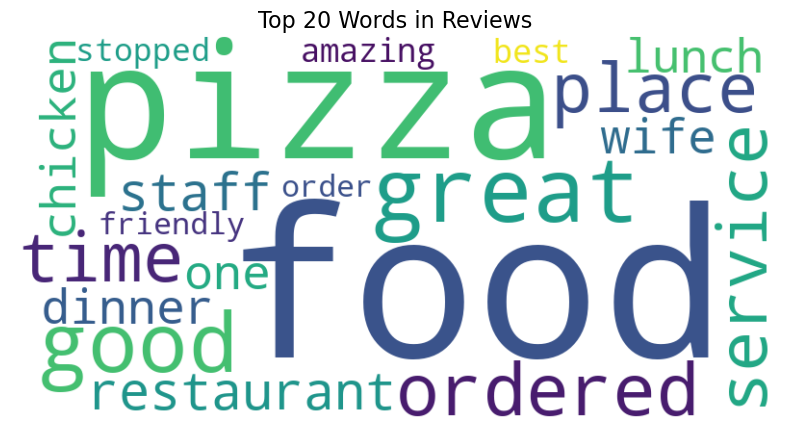

In [142]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize

# Combine all cleaned reviews into a single text
all_reviews_text = ' '.join(cleaned_reviews)

# Tokenize words
words = word_tokenize(all_reviews_text)

# Calculate word frequencies
word_freq = Counter(words)

# Select the top 20 most frequent words
top_20_words = dict(word_freq.most_common(20))

# Generate the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_20_words)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axes
plt.title("Top 20 Words in Reviews", fontsize=16)
plt.show()

Pizza seems to be the most mentioned food. Reviewers placed a high value on time and friendliness of staff.  